In [1]:
#This code snippet demonstrates how a DecisionTreeRegression classifer compares to linear regression for predicting mpg where the purple line is linear regression and the red line is a tree classifier

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE


     MPG          Make             Model  Displacement  Horse Power  \
0   18.8  Aston Martin              DB11           5.2          600   
2   22.7  Aston Martin           DB11 V8           4.0          503   
4   17.7  Aston Martin               DBS           5.2          715   
6   22.5  Aston Martin        Vantage V8           4.0          503   
14  28.6           BMW  230i Convertible           2.0          248   

    Cylinders  Number_Of_Gears  Weight  Test Procedure Cd  
0        12.0                8    4500                 21  
2         8.0                8    4500                 21  
4        12.0                8    4500                 21  
6         8.0                8    4000                 21  
14        4.0                8    4000                 21  


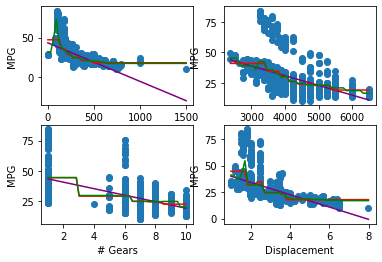

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/cars_mpg_tree_classifiers.csv",usecols=["MPG","Make","Model","Displacement","Horse Power","Cylinders","Number_Of_Gears","Weight","Test Procedure Cd"])
df=df[df["Test Procedure Cd"]==21]
print(df.head(5))

dt=DecisionTreeRegressor(max_depth=4,
	min_samples_leaf=0.1,  #each leaf must contain 10% of the training data
	random_state=3)

regression=LinearRegression()
SEED=1

gbt=GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

#######Horse Power
X_horsePower=np.array(df["Horse Power"]).reshape(-1,1)
y_mpg=np.array(df["MPG"])

reg.fit(X_horsePower,y_mpg)
prediction_space=np.linspace(min(X_horsePower),max(X_horsePower)).reshape(-1,1)
fig, ax= plt.subplots(2,2)
ax[0,0].scatter(df["Horse Power"],y_mpg)
ax[0,0].set_xlabel('Horse Power')
ax[0,0].set_ylabel('MPG')

X_train, X_test,y_train,y_test=train_test_split(X_horsePower,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 

#######Weight
#y_prediction=regression.predict(X_test)
ax[0,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,0].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[0,0].plot(prediction_space, gbt.predict(prediction_space), c="Green")

X_weight=np.array(df["Weight"]).reshape(-1,1)
prediction_space=np.linspace(min(X_weight),max(X_weight)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_weight,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 
ax[0,1].scatter(pd.Series(df["Weight"]),y_mpg)
ax[0,1].set_xlabel('Weight')
ax[0,1].set_ylabel('MPG')
ax[0,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,1].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[0,1].plot(prediction_space, gbt.predict(prediction_space), c="Green")

#######Number of Gears
X_gears=np.array(df["Number_Of_Gears"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_gears)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_gears,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 

ax[1,0].scatter(pd.Series(df["Number_Of_Gears"]),y_mpg)
ax[1,0].set_xlabel('# Gears')
ax[1,0].set_ylabel('MPG')
ax[1,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,0].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[1,0].plot(prediction_space, gbt.predict(prediction_space), c="Green")

X_displacement=np.array(df["Displacement"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_displacement)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_displacement,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 
#######Displacement
ax[1,1].scatter(pd.Series(df["Displacement"]),y_mpg)
ax[1,1].set_xlabel('Displacement')
ax[1,1].set_ylabel('MPG')
ax[1,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,1].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[1,1].plot(prediction_space, gbt.predict(prediction_space), c="Green")

plt.show()






    Horse Power  Weight   MPG
0           600    4500  18.8
2           503    4500  22.7
4           715    4500  17.7
6           503    4000  22.5
14          248    4000  28.6
[[ 600. 4500.]
 [ 503. 4500.]
 [ 715. 4500.]
 ...
 [ 250. 4500.]
 [ 316. 5000.]
 [ 316. 5000.]]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
850/850 [==============================] - 0s 108us/step - loss: 404.5921 - accuracy: 0.0012
Epoch 2/1000
850/850 [==============================] - 0s 49us/step - loss: 145.5089 - accuracy: 0.0071
Epoch 3/1000
850/850 [==============================] - 0s 52us/step - loss: 191.5652 - accuracy: 0.0024
Epoch 4/1000
850/850 [==============================] - 0s 48us/step - loss: 240.7175 - accuracy: 0.0047
Epoch 5/1000
850/850 [==============================] - 0s 45us/step - loss: 133.1146 - accuracy: 0.0082
Epoch 6/1000
 32/850 [>.............................] - ETA: 0s - loss: 45.1370 - accuracy: 0.0000e+00

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


850/850 [==============================] - 0s 51us/step - loss: 120.7500 - accuracy: 0.0118
Epoch 7/1000
850/850 [==============================] - 0s 42us/step - loss: 110.0619 - accuracy: 0.0012
Epoch 8/1000
850/850 [==============================] - 0s 41us/step - loss: 109.9365 - accuracy: 0.0059
Epoch 9/1000
850/850 [==============================] - 0s 38us/step - loss: 102.1606 - accuracy: 0.0012
Epoch 10/1000
850/850 [==============================] - 0s 39us/step - loss: 80.2501 - accuracy: 0.0082
Epoch 11/1000
850/850 [==============================] - 0s 49us/step - loss: 99.4305 - accuracy: 0.0094
Epoch 12/1000
850/850 [==============================] - 0s 47us/step - loss: 89.9398 - accuracy: 0.0106
Epoch 13/1000
850/850 [==============================] - 0s 45us/step - loss: 85.2642 - accuracy: 0.0082
Epoch 14/1000
850/850 [==============================] - 0s 47us/step - loss: 88.0225 - accuracy: 0.0118
Epoch 15/1000
850/850 [==============================] - 0s 46us/ste

850/850 [==============================] - 0s 35us/step - loss: 51.3513 - accuracy: 0.0165
Epoch 161/1000
850/850 [==============================] - 0s 40us/step - loss: 55.2479 - accuracy: 0.0153
Epoch 162/1000
850/850 [==============================] - 0s 38us/step - loss: 45.9701 - accuracy: 0.0071
Epoch 163/1000
850/850 [==============================] - 0s 37us/step - loss: 48.1516 - accuracy: 0.0188
Epoch 164/1000
850/850 [==============================] - 0s 38us/step - loss: 48.9245 - accuracy: 0.0129
Epoch 165/1000
850/850 [==============================] - 0s 34us/step - loss: 54.6885 - accuracy: 0.0082
Epoch 166/1000
850/850 [==============================] - 0s 35us/step - loss: 55.3984 - accuracy: 0.0071
Epoch 167/1000
850/850 [==============================] - 0s 46us/step - loss: 42.9886 - accuracy: 0.0153
Epoch 168/1000
850/850 [==============================] - ETA: 0s - loss: 26.0013 - accuracy: 0.0000e+0 - 0s 38us/step - loss: 51.1445 - accuracy: 0.0188
Epoch 169/100

850/850 [==============================] - 0s 36us/step - loss: 72.8386 - accuracy: 0.0129
Epoch 237/1000
850/850 [==============================] - 0s 36us/step - loss: 50.6715 - accuracy: 0.0165
Epoch 238/1000
850/850 [==============================] - 0s 36us/step - loss: 49.7318 - accuracy: 0.0118
Epoch 239/1000
850/850 [==============================] - 0s 38us/step - loss: 69.9305 - accuracy: 0.0094
Epoch 240/1000
850/850 [==============================] - 0s 35us/step - loss: 60.0837 - accuracy: 0.0129
Epoch 241/1000
850/850 [==============================] - 0s 35us/step - loss: 51.8606 - accuracy: 0.0129
Epoch 242/1000
850/850 [==============================] - 0s 35us/step - loss: 69.4453 - accuracy: 0.0094
Epoch 243/1000
850/850 [==============================] - 0s 36us/step - loss: 46.6327 - accuracy: 0.0094
Epoch 244/1000
850/850 [==============================] - 0s 37us/step - loss: 56.4755 - accuracy: 0.0176
Epoch 245/1000
850/850 [==============================] - 0s 

850/850 [==============================] - 0s 42us/step - loss: 41.1792 - accuracy: 0.0129
Epoch 391/1000
850/850 [==============================] - 0s 47us/step - loss: 46.8968 - accuracy: 0.0165
Epoch 392/1000
850/850 [==============================] - 0s 42us/step - loss: 52.4689 - accuracy: 0.0153
Epoch 393/1000
850/850 [==============================] - ETA: 0s - loss: 40.5011 - accuracy: 0.062 - 0s 35us/step - loss: 47.8764 - accuracy: 0.0188
Epoch 394/1000
850/850 [==============================] - 0s 43us/step - loss: 44.4510 - accuracy: 0.0094
Epoch 395/1000
850/850 [==============================] - 0s 36us/step - loss: 60.5175 - accuracy: 0.0106
Epoch 396/1000
850/850 [==============================] - 0s 37us/step - loss: 46.2047 - accuracy: 0.0165
Epoch 397/1000
850/850 [==============================] - 0s 38us/step - loss: 39.6250 - accuracy: 0.0176
Epoch 398/1000
850/850 [==============================] - 0s 35us/step - loss: 41.2003 - accuracy: 0.0141
Epoch 399/1000
85

850/850 [==============================] - 0s 38us/step - loss: 40.4168 - accuracy: 0.0106
Epoch 543/1000
850/850 [==============================] - 0s 37us/step - loss: 37.1379 - accuracy: 0.0106
Epoch 544/1000
850/850 [==============================] - 0s 37us/step - loss: 41.3967 - accuracy: 0.0106
Epoch 545/1000
850/850 [==============================] - 0s 39us/step - loss: 42.2503 - accuracy: 0.0141
Epoch 546/1000
850/850 [==============================] - 0s 38us/step - loss: 39.8248 - accuracy: 0.0118
Epoch 547/1000
850/850 [==============================] - 0s 37us/step - loss: 40.6969 - accuracy: 0.0106
Epoch 548/1000
850/850 [==============================] - 0s 38us/step - loss: 41.3482 - accuracy: 0.0106
Epoch 549/1000
850/850 [==============================] - 0s 36us/step - loss: 35.8833 - accuracy: 0.0141
Epoch 550/1000
850/850 [==============================] - 0s 36us/step - loss: 40.6809 - accuracy: 0.0106
Epoch 551/1000
850/850 [==============================] - 0s 

850/850 [==============================] - 0s 61us/step - loss: 44.5746 - accuracy: 0.0106
Epoch 620/1000
850/850 [==============================] - 0s 54us/step - loss: 41.3880 - accuracy: 0.0094
Epoch 621/1000
850/850 [==============================] - 0s 56us/step - loss: 36.3272 - accuracy: 0.0129
Epoch 622/1000
850/850 [==============================] - 0s 56us/step - loss: 33.2042 - accuracy: 0.0082
Epoch 623/1000
850/850 [==============================] - 0s 55us/step - loss: 33.6179 - accuracy: 0.0153
Epoch 624/1000
850/850 [==============================] - 0s 68us/step - loss: 36.5449 - accuracy: 0.0059
Epoch 625/1000
850/850 [==============================] - 0s 52us/step - loss: 37.3320 - accuracy: 0.0118
Epoch 626/1000
850/850 [==============================] - 0s 56us/step - loss: 41.9522 - accuracy: 0.0118
Epoch 627/1000
850/850 [==============================] - 0s 56us/step - loss: 39.4031 - accuracy: 0.0141
Epoch 628/1000
850/850 [==============================] - 0s 

850/850 [==============================] - 0s 42us/step - loss: 30.2960 - accuracy: 0.0129
Epoch 774/1000
850/850 [==============================] - 0s 38us/step - loss: 33.4408 - accuracy: 0.0094
Epoch 775/1000
850/850 [==============================] - 0s 38us/step - loss: 34.6181 - accuracy: 0.0094
Epoch 776/1000
850/850 [==============================] - 0s 45us/step - loss: 32.3104 - accuracy: 0.0118
Epoch 777/1000
850/850 [==============================] - 0s 39us/step - loss: 28.9157 - accuracy: 0.0129
Epoch 778/1000
850/850 [==============================] - 0s 44us/step - loss: 29.1640 - accuracy: 0.0129
Epoch 779/1000
850/850 [==============================] - 0s 58us/step - loss: 31.0387 - accuracy: 0.0071
Epoch 780/1000
850/850 [==============================] - 0s 57us/step - loss: 30.5485 - accuracy: 0.0188
Epoch 781/1000
850/850 [==============================] - 0s 71us/step - loss: 31.5961 - accuracy: 0.0165
Epoch 782/1000
850/850 [==============================] - 0s 

Epoch 926/1000
850/850 [==============================] - 0s 44us/step - loss: 29.1521 - accuracy: 0.0153
Epoch 927/1000
850/850 [==============================] - 0s 35us/step - loss: 27.2188 - accuracy: 0.0153
Epoch 928/1000
850/850 [==============================] - 0s 37us/step - loss: 30.0909 - accuracy: 0.0141
Epoch 929/1000
850/850 [==============================] - 0s 41us/step - loss: 40.0197 - accuracy: 0.0129
Epoch 930/1000
850/850 [==============================] - 0s 38us/step - loss: 32.0841 - accuracy: 0.0106
Epoch 931/1000
850/850 [==============================] - 0s 38us/step - loss: 37.6391 - accuracy: 0.0129
Epoch 932/1000
850/850 [==============================] - 0s 38us/step - loss: 34.6695 - accuracy: 0.0082
Epoch 933/1000
850/850 [==============================] - 0s 34us/step - loss: 31.0488 - accuracy: 0.0141
Epoch 934/1000
850/850 [==============================] - 0s 44us/step - loss: 30.5214 - accuracy: 0.0153
Epoch 935/1000
850/850 [======================

[23.516102]:23.8
[21.874632]:24.2
[19.228024]:18.7
[22.122849]:17.7
[30.798801]:28.1
[29.288975]:33.1
[30.82904]:30.0
[22.751123]:23.2
[25.027794]:27.5
[34.60618]:37.0
[21.361622]:19.3
[24.128628]:24.1
[24.663612]:24.2
[31.987381]:32.4
[14.499773]:15.0
[31.037071]:33.7
[31.520966]:35.7
[23.850067]:16.8
[19.00729]:17.2
[24.599928]:25.2
[31.615492]:35.4
[36.538956]:36.8
[20.896786]:16.9
[24.648651]:25.0
[33.834244]:27.7
[20.575996]:16.4
[26.570305]:28.1
[17.12331]:16.1
[25.347095]:28.9
[23.516102]:23.6
[26.392414]:27.9
[28.056862]:25.4
[56.743496]:80.8
[21.441753]:24.0
[30.231644]:32.0
[33.571484]:39.9
[17.12331]:15.3
[17.607319]:14.5
[25.168665]:24.6
[25.041742]:23.6
[25.347095]:29.8
[21.239294]:21.9
[32.65528]:33.5
[24.128628]:24.0
[26.617315]:25.6
[32.88885]:31.8
[18.930756]:20.5
[31.067093]:25.7
[23.668072]:22.0
[33.37871]:38.8
[33.591698]:34.2
[46.635517]:62.4
[22.435318]:18.6
[36.991432]:40.5
[40.51673]:34.3
[27.96651]:24.5
[31.522234]:27.8
[32.529243]:29.4
[23.578453]:24.7
[22.122

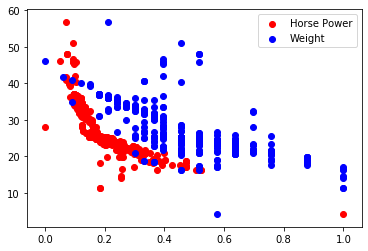

In [37]:

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn import preprocessing
import sys

#X_df=df[["Horse Power","Weight","Number_Of_Gears","Displacement","MPG"]]
#X_df=df[["Weight","Displacement","MPG"]]
X_df=df[["Horse Power","Weight","MPG"]]
print(X_df.head(5))

dataset=np.nan_to_num(X_df.values)
X=dataset[:,0:-1]
y=dataset[:,-1]

print(X)
#print(y)
#sys.exit()


min_max_scaler= preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
   
X_train, X_test, y_train, y_test= train_test_split(X_scale,y,test_size=0.3)

early_stopping_monitor=EarlyStopping(patience=3)

n_cols=X.shape[1]
model=Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='tanh', input_shape=(1,)))
#model.add(Dense(100, activation='tanh'))

model.add(Dense(1))

#myOptimizer=SGD(0.1)
#model.compile(optimizer=myOptimizer, loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=myOptimizer,  metrics=['accuracy'])
model.fit(X_train, y_train,callbacks=[early_stopping_monitor],  nb_epoch=1000)
#model.fit(X, y,callbacks=[early_stopping_monitor],  nb_epoch=20)

predictionResults=model.predict(X_test)

index=0
for item in predictionResults:
    print (str(item)+":"+str(y_test[index]) 
           #+ 'hp:' + str(X_test[index,0]) 
           #+ 'wgt:'+ str(X_test[index,1]) 
#          + 'gears:' + str(X_test[index,2]) 
#           + 'displacement:'+ str(X_test[index,3])
          )
    index+=1

plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Horse Power")
plt.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Weight")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Displacement")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Weight")
#plt.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Displacement")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Horse Power")
#plt.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Weight")
#plt.scatter(X_test[:,2],predictionResults[:,0],color='green', label="Gears")
#plt.scatter(X_test[:,3],predictionResults[:,0],color='purple', label="Displacement")
plt.legend()
#plt.plot(x,y)
plt.show()